In [104]:
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
csv_path = "/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/validation/validation_full_log_agent19.csv"
agent_results_df = pd.read_csv(csv_path)

In [106]:
# Set 'Step' as the index
agent_results_df = agent_results_df.set_index('Step')

# Scale the 'EffRatio' column by multiplying it by 3
agent_results_df['EffRatio'] = agent_results_df['EffRatio'] * 3
agent_results_df['Pressure Score'] = agent_results_df['Pressure Score'] * 1.5
agent_results_df['Energy'] = agent_results_df['Energy']*-0.02

# Display the updated DataFrame (all columns should remain intact)
agent_results_df.head()


,ActionIndex,DemandScale,Reward,EffRatio,Pressure Score,Energy,Q_0,Q_1,Q_2,Q_3,...,Head_16,Head_17,Head_18,PumpGroupSpeed_1,PumpGroupSpeed_2,PumpPower_10,PumpPower_17,PumpPower_25,PumpPower_26,PumpPower_27
Step,,,,,,,,,,,,,,,,,,,,,
0,196,1.4,1.806331,0.931145,1.381881,-2.026784,0.998119,0.927150,1.115626,1.110916,...,75.875314,75.880581,75.821255,1.0,0.88,32.932724,32.884863,12.005157,12.011131,11.505302
1,193,1.4,1.592445,0.931146,1.154201,-1.971608,1.086183,0.992618,1.135827,1.203717,...,75.875314,75.880581,75.821255,1.0,0.79,32.932724,32.884863,12.005157,12.011131,8.746546
2,193,1.0,2.301876,1.291703,1.378044,-1.471481,1.089408,0.982694,1.129415,1.187070,...,78.182668,78.185614,78.152572,1.0,0.79,25.245194,25.216192,7.956520,7.960902,7.195223
3,193,1.4,1.592445,0.931146,1.154201,-1.971608,1.027668,0.940920,1.094799,1.160762,...,75.875314,75.880581,75.821255,1.0,0.79,32.932724,32.884863,12.005157,12.011131,8.746546
4,193,1.4,1.592445,0.931146,1.154201,-1.971608,1.089408,0.982694,1.129415,1.187070,...,75.875314,75.880581,75.821255,1.0,0.79,32.932724,32.884863,12.005157,12.011131,8.746546


In [124]:
agent_results_df.columns[25]

'Q_19'

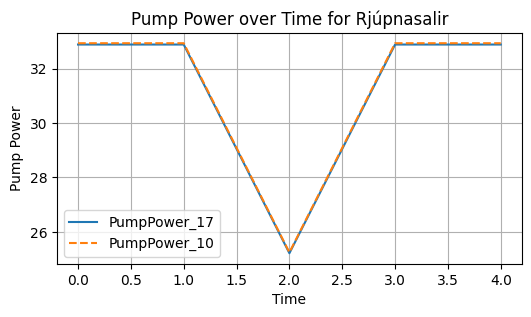

In [108]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_17'], label='PumpPower_17')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_10'], label='PumpPower_10', linestyle='--')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Rjúpnasalir")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


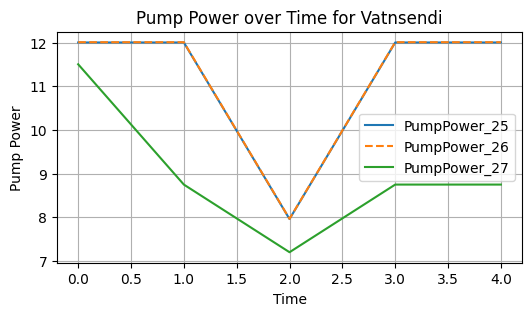

In [109]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_25'], label='PumpPower_25')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_26'], label='PumpPower_26', linestyle='--')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_27'], label='PumpPower_27')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)
# plt.ylim(8,19)

# Display the legend
plt.legend()

# Show the plot
plt.show()


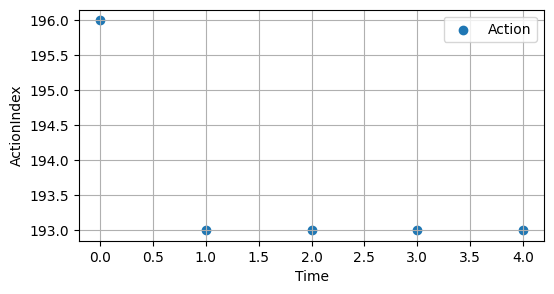

In [110]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.scatter(agent_results_df.index, agent_results_df['ActionIndex'], label='Action')


# Add labels and title
plt.xlabel("Time")
plt.ylabel("ActionIndex")
# plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()

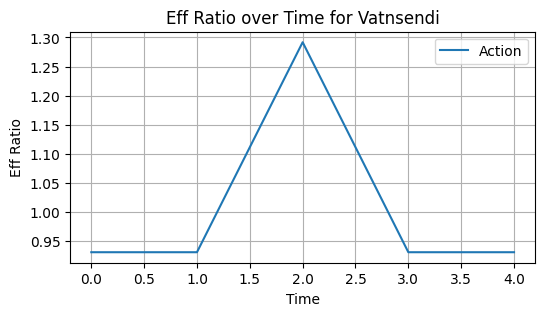

In [111]:

plt.figure(figsize=(6, 3))

# Plot the 'EffRatio' data
plt.plot(agent_results_df.index, agent_results_df['EffRatio'], label='Action')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Eff Ratio")
plt.title("Eff Ratio over Time for Vatnsendi")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


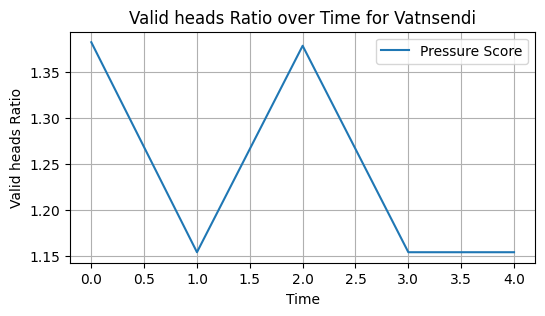

In [112]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['Pressure Score'], label='Pressure Score')


# Add labels and title
plt.xlabel("Time")
plt.ylabel("Valid heads Ratio")
plt.title("Valid heads Ratio over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


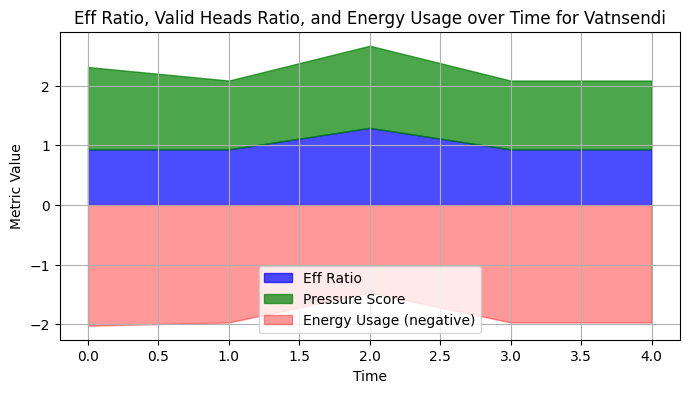

In [113]:
import matplotlib.pyplot as plt

# Create a new column for the sum of EffRatio and ValidHeadsRatio
agent_results_df['Total'] = agent_results_df['EffRatio'] + agent_results_df['Pressure Score']

plt.figure(figsize=(8, 4))

# Plot the stacked area chart for EffRatio and ValidHeadsRatio
plt.fill_between(agent_results_df.index, 0, agent_results_df['EffRatio'], label='Eff Ratio', color='blue', alpha=0.7)
plt.fill_between(agent_results_df.index, agent_results_df['EffRatio'], agent_results_df['Total'], label='Pressure Score', color='green', alpha=0.7)

# Plot Energy (negative) below x-axis
plt.fill_between(agent_results_df.index, 0, agent_results_df['Energy'], label='Energy Usage (negative)', color='red', alpha=0.4)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Metric Value")
plt.title("Eff Ratio, Valid Heads Ratio, and Energy Usage over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


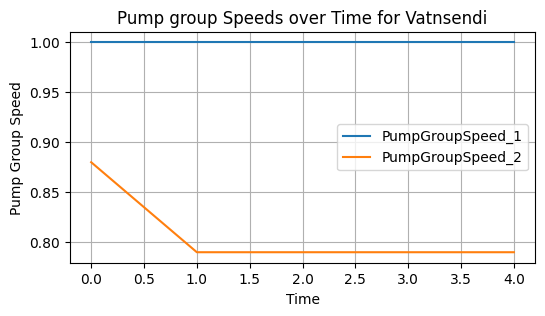

In [114]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpGroupSpeed_1'], label='PumpGroupSpeed_1')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpGroupSpeed_2'], label='PumpGroupSpeed_2')
# Plot the 'PumpPower_17' data


# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Group Speed")
plt.title("Pump group Speeds over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [115]:
for i in range(len(agent_results_df)):
    print(f"Step {i}  Group 1: {agent_results_df['PumpGroupSpeed_1'][i]},  Group 2: {agent_results_df['PumpGroupSpeed_2'][i]}, Demand scale {agent_results_df['DemandScale'][i]}")


Step 0  Group 1: 1.0,  Group 2: 0.88, Demand scale 1.4
Step 1  Group 1: 1.0,  Group 2: 0.79, Demand scale 1.4
Step 2  Group 1: 1.0,  Group 2: 0.79, Demand scale 1.0
Step 3  Group 1: 1.0,  Group 2: 0.79, Demand scale 1.4
Step 4  Group 1: 1.0,  Group 2: 0.79, Demand scale 1.4


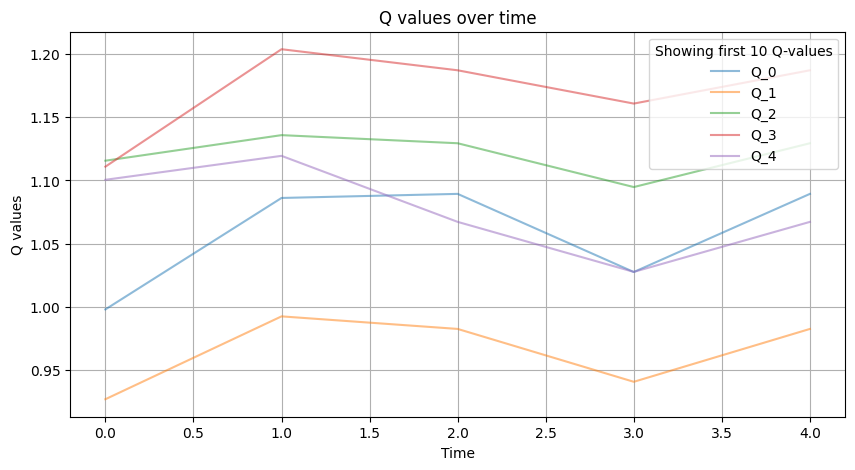

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Loop through all Q-value columns
for i in range(360):
    plt.plot(agent_results_df.index, agent_results_df[f'Q_{i}'], label=f'Q_{i}', alpha=0.5)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Q values")
plt.title("Q values over time")
plt.grid(True)

# Display legend only for the first few to avoid clutter
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:10], labels[:10], loc='upper right', title='Showing first 10 Q-values')

# Show the plot
plt.show()
